In [47]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [48]:
def integrate(x: np.array, y: np.array) -> float:
    return np.sum(
        (
                x[1:] - x[:-1]
        ) * (
                (
                        y[:-1] + y[1:]
                )/2
        )
    )

x = np.linspace(0, 1, 100)
print("### integrate ###")
%timeit integrate(x, 10 * x + 2)

### integrate ###
4.98 µs ± 162 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### generate_graph ###


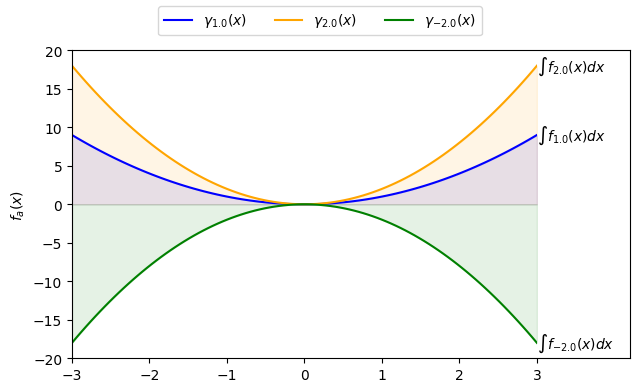

In [171]:
def generate_graph(a: List[float], show_figure: bool = False, save_path: str | None=None):
    colors = ["blue", "orange", "green"]
    x = np.linspace(-3, 3, 100)
    xsq = x**2
    ys = xsq * np.array([a]).T

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot()
    ax.margins(0,0)
    ax.spines["top"].set_bounds(-3, 4.2)
    ax.spines["bottom"].set_bounds(-3, 4.2)
    ax.spines["right"].set_position(("data", 4.2))
    
    ax.set_ylim(-20, 20)
    ax.set_ylabel(r'$f_{a}(x)$')
    
    for i in range(a_len := len(a)):
        ax.plot(x, ys[i], color=colors[i % 3], label=fr"$\gamma_{ {a[i]} }(x)$")
        ax.fill_between(x, ys[i], color=colors[i % 3], alpha=.1, label='_nolegend_')
        ax.annotate(fr"$\int f_{ {a[i]} }(x)dx$", xy=(x[-1], ys[i, -1]), xytext=(0,-4), textcoords="offset points")
    
    fig.legend(loc='upper center', ncol=a_len)
    
    if show_figure:
        plt.show()
    elif save_path:
        fig.savefig(save_path, bbox_inches = 'tight')

print("### generate_graph ###")
generate_graph([1., 2., -2.], show_figure=False, save_path="plot.png")

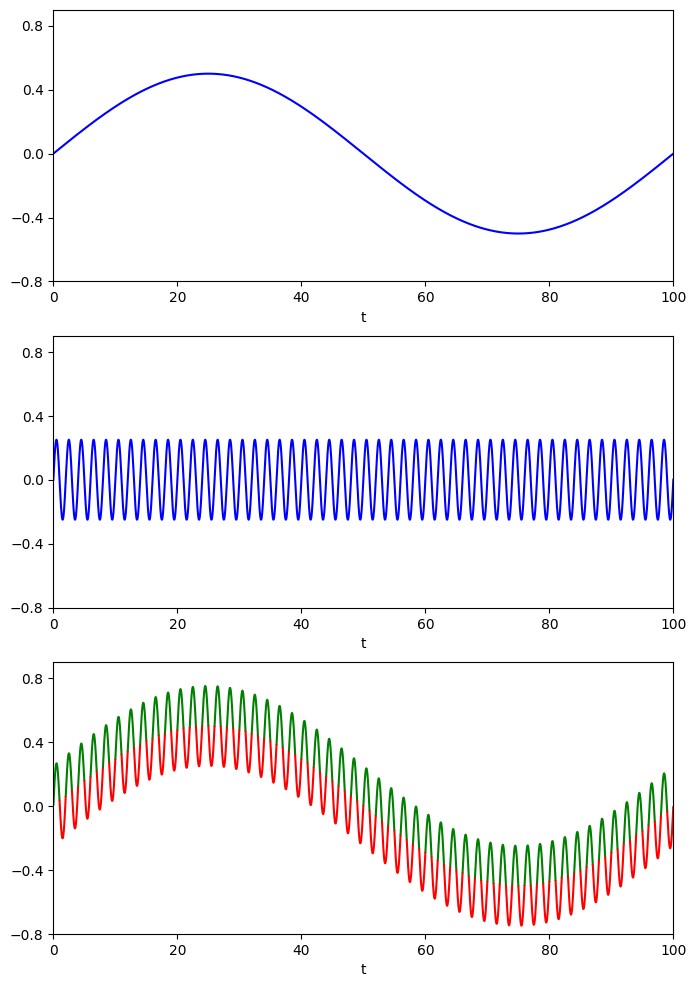

In [241]:
def plot_func(fig, t, func, thresholds = None):
    fig.set_ylim(-0.8, 0.9)
    fig.yaxis.set_ticks(np.arange(-0.8, 0.9, 0.4))
    fig.set_xlabel("t")
    fig.margins(0,0)
    if not isinstance(thresholds, np.ndarray):
        fig.plot(t, func, color="blue")
    else:
        positive = func > thresholds
        tcopy = t.copy()
        funccopy = func.copy()
        tcopy[~positive] = np.nan
        funccopy[~positive] = np.nan

        fig.plot(tcopy, funccopy, color="green")
        t[positive] = np.nan
        func[positive] = np.nan
        fig.plot(t, func, color="red")

t = np.linspace(0, 100, 10000)
f1 = np.double(0.5) * np.sin(np.pi * t * np.double(1/50))
f2 = np.double(0.25) * np.sin(np.pi * t)

fig = plt.figure(figsize=(8,12))
a1, a2, a3 = fig.subplots(nrows=3)

plot_func(a1, t, f1)
plot_func(a2, t, f2)
plot_func(a3, t, f1 + f2, f1)

plt.show()

In [268]:
def to_int(val):
    try:
        return int(val.text)
    except ValueError:
        return 0

def to_float(val):
    try:
        return np.float64(val.text.replace(",", "."))
    except (ValueError, AttributeError):
        return np.nan

url="https://ehw.fit.vutbr.cz/izv/temp.html"
try:
    request = requests.get(url)
except requests.exceptions.RequestException as e:
    print(f"Could not get page: {e}")

soup = BeautifulSoup(request.content, "html.parser")
rows = soup.select("table > tr")
parsed = []

for row in rows:
    cols = row.select("td > p")
    parsed.append(
        {
            "year": to_int(cols[0]),
            "month": to_int(cols[1]),
            "temp": np.fromiter(map(to_float, cols[2:]), dtype=np.float64)
        }
    )

print(parsed)


[{'year': 2018, 'month': 1, 'temp': array([ 0.9,  1.5,  1.1,  4.4,  5.1,  7.4,  6.2,  3. ,  5.3,  3.2,  3.2,
        3.3,  0.4, -1.8, -1.9, -1.8,  1.5,  2.4,  0.5, -0.7,  0.7, -2.9,
       -0.3,  1.2,  0.6,  1.8,  2.2,  4.9,  7.1,  4. ,  0.2])}, {'year': 2018, 'month': 2, 'temp': array([  3. ,   1.7,   1.5,   1.5,  -1.3,  -1.9,   0.1,   0.3,  -1. ,
        -1.2,   0.1,   1.8,   0.9,   0.2,  -0.3,  -1.7,  -0.5,  -0.8,
        -4.1,  -0.9,  -1. ,  -1.7,  -2.3,  -5.4,  -9.7,  -9.5, -10.3,
        -9.5])}, {'year': 2018, 'month': 3, 'temp': array([-8.3, -6.5, -5.4, -4.1, -0.8,  0.7,  2.8,  4.5,  4.5,  8.4,  9.5,
        9.6,  8.3,  5.5,  5.8,  5.7, -2.8, -4.8, -4.3, -1.5, -1.5,  0.7,
        3.5,  3.4,  2.8,  3.6,  3.5,  6. ,  8.6,  8. , 10.4])}, {'year': 2018, 'month': 4, 'temp': array([ 7.3,  6.4, 12.1, 12. , 10.8,  7.9,  9.7, 15.1, 17.1, 14.5, 14.6,
       18.2, 14. , 13.8, 16.9, 15.8, 16. , 16.2, 18.6, 18.5, 19.7, 17.3,
       17.5, 18.2, 18.5, 13. , 11.9, 18.1, 21.5, 19.7])}, {'year':

In [274]:
def filter_data(table, key, value):
    return list(
        filter(
            lambda x: x[key] == value,
            table
        )
    )

data = parsed
year = None
month = 5

if year is not None:
    data = filter_data(data, "year", year)

if month is not None:
    data = filter_data(data, "month", month)

sum_temp = np.float64(0)
len_temp = np.uint32(0)

for row in data:
    sum_temp += np.sum(row["temp"])
    len_temp += row["temp"].size  # 1d array

print(sum_temp / len_temp)

14.91935483870968


In [14]:
#!/usr/bin/env python3
"""
IZV cast1 projektu
Autor: Samuel Dobroň
Verzia: Python 3.10.7

Detailni zadani projektu je v samostatnem projektu e-learningu.
Nezapomente na to, ze python soubory maji dane formatovani.

Muzete pouzit libovolnou vestavenou knihovnu a knihovny predstavene na prednasce
"""
import bs4
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Any


def integrate(x: np.array, y: np.array) -> float:
    """
        Function returns area under the function defined by x and y arrays, where:

        :param x: points on axis X
        :param y: values of function on axis Y
        :return: area as a float
    """
    return np.sum(
        (
                x[1:] - x[:-1]
        ) * (
                (
                        y[:-1] + y[1:]
                )/2
        )
    )


def generate_graph(
    a: List[float], show_figure: bool = False, save_path: str | None = None
):
    """
        Function generates graph for function f(x) = a[i] * x^2, where i comes from list a

    :param a: list of coefficients
    :param show_figure: boolean value whether show plot or not
    :param save_path: path for saving generated plot
    """
    colors = ["blue", "orange", "green"]
    x = np.linspace(-3, 3, 100)
    xsq = x**2
    ys = xsq * np.array([a]).T  # transposing it to get 3 rows of 1 coefficient that multiplies xsq

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()
    ax.margins(0, 0)  # make curve start at the axis
    ax.spines["top"].set_bounds(-3, 4.2)
    ax.spines["bottom"].set_bounds(-3, 4.2)
    ax.spines["right"].set_position(("data", 4.2))
    # ^^^ move right axis to make space for annotations

    ax.set_ylim(-20, 20)
    ax.set_ylabel(r"$f_{a}(x)$")

    for i in range(a_len := len(a)):
        ax.plot(
            x, ys[i], color=colors[i % 3], label=rf"$\gamma_{ {a[i]} }(x)$"
        )
        ax.fill_between(
            x, ys[i], color=colors[i % 3], alpha=0.1, label="_nolegend_"
        )
        ax.annotate(
            rf"$\int f_{ {a[i]} }(x)dx$",
            xy=(x[-1], ys[i, -1]),
            xytext=(0, -4),
            textcoords="offset points",
        )

    fig.legend(loc="upper center", ncol=a_len)

    if show_figure:
        plt.show()
    elif save_path:
        fig.savefig(save_path, bbox_inches="tight")
    plt.close(fig)


def plot_func(fig, t, func, thresholds=None):
    """
        Function draws function on figure.

    :param fig: figure to draw
    :param t: array time (a.k.a. X axis)
    :param func: array of values (Y axis)
    :param thresholds: list of values whose are used as condition for line color
    """
    fig.set_ylim(-0.8, 0.9)
    fig.yaxis.set_ticks(np.arange(-0.8, 0.9, 0.4))
    fig.set_xlabel("t")
    fig.margins(0, 0)
    if not isinstance(thresholds, np.ndarray):  # should be faster than comparing by "is not None"
        fig.plot(t, func, color="blue")
    else:
        positive = func > thresholds
        tcopy = t.copy()
        funccopy = func.copy()

        # hide negative (red) part of values
        tcopy[~positive] = np.nan
        funccopy[~positive] = np.nan

        fig.plot(tcopy, funccopy, color="green")

        # hide positive (green) part of values
        t[positive] = np.nan
        func[positive] = np.nan

        fig.plot(t, func, color="red")


def generate_sinus(show_figure: bool = False, save_path: str | None = None):
    """
        Function generates 3 sinus waves.

    :param show_figure: boolean value whether show plot or not
    :param save_path: path for saving generated plot
    """
    t = np.linspace(0, 100, 10000)
    f1 = np.double(0.5) * np.sin(np.pi * t * np.double(1 / 50))
    f2 = np.double(0.25) * np.sin(np.pi * t)

    fig = plt.figure(figsize=(8, 12))
    a1, a2, a3 = fig.subplots(nrows=3)

    plot_func(a1, t, f1)
    plot_func(a2, t, f2)
    plot_func(a3, t, f1 + f2, f1)

    if show_figure:
        plt.show()
    elif save_path:
        fig.savefig(save_path, bbox_inches="tight")
    plt.close(fig)


def to_int(val: bs4.element.Tag):
    """
        Function converts tag text to int.

    :param val: tag that contains string representation of int
    :return: int(val); in case of error 0
    """
    try:
        return int(val.text)
    except ValueError:
        return 0


def to_float(val: bs4.element.Tag):
    """
        Function converts tag text to float64.

    :param val: tag that contains string representation of float value
    :return: float value of val; on error np.nan is returned
    """
    try:
        return np.float64(val.text.replace(",", "."))
    except (ValueError, AttributeError):
        return np.nan


def download_data(url="https://ehw.fit.vutbr.cz/izv/temp.html") -> list[dict[str, Any]]:
    """
        Function downloads and parses data from table at url.

    :param url: url to gather data from
    :return: list of dictionaries that contains parsed data; on error empty list
    """
    try:
        request = requests.get(url)
    except requests.exceptions.RequestException as e:
        print(f"Could not get page: {e}")
        return []

    soup = BeautifulSoup(request.content, "html.parser")
    rows = soup.select("table > tr")
    parsed = []

    for row in rows:
        cols = row.select("td > p")
        parsed.append(
            {
                "year": to_int(cols[0]),
                "month": to_int(cols[1]),
                "temp": np.fromiter(map(to_float, cols[2:]), dtype=np.float64)
            }
        )
    return parsed


def filter_data(table: list[dict[str, Any]], key: str, value: Any) -> list[dict[str, Any]]:
    """
        Function filters list of dictionaries based on element[key] == value condition.

    :param table: list of dictionaries from download_data() method
    :param key: key used to filter
    :param value: value used to filter
    :return: list of filtered dictionaries
    """
    return list(
        filter(
            lambda x: x[key] == value,
            table
        )
    )


def get_avg_temp(data: list[dict[str, Any]], year: int = None, month: int = None) -> float:
    """
        Method returns average temperature based on year/month, year+month.

    :param data: data to get average from
    :param year: year
    :param month: month
    :return: average temperature; 0 on error
    """
    if year is not None:
        data = filter_data(data, "year", year)

    if month is not None:
        data = filter_data(data, "month", month)

    sum_temp = np.float64(0)
    len_temp = np.uint32(0)

    for row in data:
        sum_temp += np.sum(row["temp"])
        len_temp += row["temp"].size  # 1d array

    if len_temp > 0:
        return sum_temp / len_temp

    return 0


In [15]:

x = np.linspace(0, 1, 100)
print("### integrate ###")
%timeit integrate(x, 10 * x + 2)
print("### generate_graph ###")
%timeit generate_graph([1., 2., -2.], show_figure=False)
print("### generate_sinus ###")
%timeit generate_sinus(show_figure=False)
print("### download_data ###")
%timeit download_data()
print("### get_avg_temp ###")
%timeit get_avg_temp(download_data())

### integrate ###
5.36 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
### generate_graph ###
7.98 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
### generate_sinus ###
16.7 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
### download_data ###
72.5 ms ± 6.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
### get_avg_temp ###
71.3 ms ± 3.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
